In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  "You are about to download and run code from an untrusted repository. In a future release, this won't "
Downloading: "https://github.com/bryandlee/animegan2-pytorch/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://github.com/bryandlee/animegan2-pytorch/raw/main/weights/face_paint_512_v2.pt" to /root/.cache/torch/hub/checkpoints/face_paint_512_v2.

  0%|          | 0.00/8.20M [00:00<?, ?B/s]

Using cache found in /root/.cache/torch/hub/bryandlee_animegan2-pytorch_main


Button(description='Upload', style=ButtonStyle())

Output()

Saving IMG_20221027_192556-removebg-preview.png to IMG_20221027_192556-removebg-preview.png


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


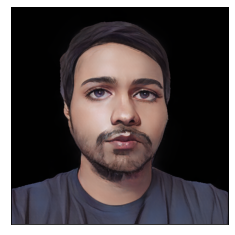

In [ ]:
import cv2
import imageio
import matplotlib.pyplot as plt

from io import BytesIO
import torch
from PIL import Image

import ipywidgets as widgets
import IPython.display as display
from google.colab import files

device = "cuda" if torch.cuda.is_available() else "cpu"
model = torch.hub.load("bryandlee/animegan2-pytorch:main", "generator", device=device).eval()
face2paint = torch.hub.load("bryandlee/animegan2-pytorch:main", "face2paint", device=device)
image_format = "png" #@param ["jpeg", "png"]

button = widgets.Button(description="Upload")
output = widgets.Output()


def run(b):
    button.disabled = True

    with output:
        display.clear_output()
    
    uploaded = files.upload()

    for fname in uploaded:
        bytes_in = uploaded[fname]

        im_in = Image.open(BytesIO(bytes_in)).convert("RGB")
        im_out = face2paint(model, im_in, side_by_side=False)
        buffer_out = BytesIO()
        im_out.save(buffer_out, format=image_format)
        # image.save(buffer_out, 'PNG')
        bytes_out = buffer_out.getvalue()
        # cv2.imwrite('/content/drive/My Drive/First Order Model/Emily_1_cartoon_animeGAN.png', bytes_out)
        # w, h = 500, 500
        dpi = 500
        # fig = plt.figure(frameon=False)
        # fig.set_size_inches(w,h)

        # ax = plt.Axes(fig, [0., 0., 1., 1.])
        # ax.set_axis_off()
        # fig.add_axes(ax)
        
        images_dir = '/content/drive/My Drive/First Order Model/'
        plt.imshow(im_out)
        # plt.imsave(images_dir, im_out.png)

        axes = plt.axes()
        axes.get_xaxis().set_visible(False)
        axes.get_yaxis().set_visible(False)
        plt.savefig(f"{images_dir}/abc.png", bbox_inches='tight', transparent=True, pad_inches=0)
        plt.show()
        wi1 = widgets.Image(value=bytes_in, format=image_format)
        wi2 = widgets.Image(value=bytes_out, format=image_format)
        wi1.layout.max_width = '500px'
        wi1.layout.max_height = '500px'
        wi2.layout.max_width = '500px'
        wi2.layout.max_height = '500px'
        # cv2.imwrite('/content/drive/My Drive/First Order Model/Emily_1_cartoon_animeGAN.png', wi2)

        ## Side by side thanks to HBox widgets
        sidebyside = widgets.HBox([wi1, wi2])
        ## Finally, show.
        with output:
            display.display(sidebyside)
        # cv2.imwrite('/content/drive/My Drive/First Order Model/Emily_1_animeGAN3.png', im_out)
    button.disabled = False

button.on_click(run)
display.display(button, output)

img = cv2.imread('Emily_2 (1).png')

# cv2.imshow(img)
# cv2.imwrite('/content/drive/My Drive/First Order Model/Emily_1_cartoon_animeGAN2.png', img)
# cv2.imwrite('/content/drive/My Drive/First Order Model/Emily_1_cartoon_animeGAN.png', bytes_out)

# imageio.mimsave('/content/drive/My Drive/First Order Model/Emily_1_cartoon_animeGAN.png', [img_as_ubyte(frame) for frame in predictions])
# imageio.imwrite('/content/drive/My Drive/First Order Model/Emily_1_cartoon_animeGAN.png', output)

In [ ]:
# from PIL import Image
# import os
# from pathlib import Path


# # path = r"/content/drive/MyDrive/aa/train"
# # path = r"Emily_2 (1).png"
# # os.chdir(path)

# # file_path = f"/content/drive/MyDrive/aa/train/xyz.jpeg"  # Image file path
# file_path = f"Emily_2 (1).png"  # Image file path

# ## image cropping and saving 

# img = Image.open(file_path)
# img = img.resize((250,250), Image.ANTIALIAS)
# img.save("/content/drive/My Drive/First Order Model/Emily_1_cartoon_animeGAN.png")

In [ ]:
# https://stackoverflow.com/questions/8218608/scipy-savefig-without-frames-axes-only-content

# w = h = 1
# dpi = 25

# fig = plt.figure(frameon=False)
# fig.set_size_inches(w,h)

# ax = plt.Axes(fig, [0., 0., 1., 1.])
# ax.set_axis_off()
# fig.add_axes(ax)
# ax.imshow(your_image, aspect='auto')
# fig.savefig(fname, dpi)

# https://stackoverflow.com/questions/49186905/loading-images-in-google-colab